<a href="https://colab.research.google.com/github/rglinton/orgproject2/blob/master/Generative_Test_11_25_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
from keras.utils import to_categorical 
from keras.datasets import cifar10 
from keras.backend import shape



In [3]:
( x_train , y_train ) , ( x_test , y_test ) = cifar10.load_data() 
NUM_CLASSES = 10
x_train = x_train.astype ('float32')/255.0 
x_test = x_test.astype ('float32')/255.0 


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
y_train = to_categorical(y_train , NUM_CLASSES) 
y_test = to_categorical(y_test , NUM_CLASSES) 

In [23]:
x_train [ 54 , 12 , 13 , 1 ] 

0.36862746

In [5]:
from keras.layers import Input , Flatten , Dense 
from keras.models import Model 

input_layer = Input (shape = ( 32 , 32 , 3 )) 

x = Flatten ()( input_layer ) 
x = Dense (units = 200 , activation = 'relu')(x)
x = Dense (units = 150 , activation = 'relu')(x) 

output_layer = Dense (units = 10 , activation = 'softmax' )(x) 
model = Model (input_layer , output_layer) 
model.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import Adam 

opt = Adam ( lr = 0.0005 ) 
model.compile(loss = 'categorical_crossentropy' , optimizer = opt , metrics = ['accuracy']) 

In [25]:
print(NUM_CLASSES)
print(shape(x_train))
print(shape(y_train))
model.fit(x_train , y_train , batch_size = 32 , epochs = 10 , shuffle = True)

10
Tensor("Shape_4:0", shape=(4,), dtype=int32)
Tensor("Shape_5:0", shape=(2,), dtype=int32)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50000/50000 [==============================] - 21s 426us/step - loss: 1.8426 - acc: 0.3384
Epoch 2/10
50000/50000 [==============================] - 19s 372us/step - loss: 1.6612 - acc: 0.4051
Epoch 3/10
50000/50000 [==============================] - 19s 374us/step - loss: 1.5796 - acc: 0.4357
Epoch 4/10
50000/50000 [==============================] - 19s 370us/step - loss: 1.5231 - acc: 0.4566
Epoch 5/10
50000/50000 [==============================] - 19s 374us/step - loss: 1.4863 - acc: 0.4704
Epoch 6/10
50000/50000 [==============================] - 19s 373us/step - loss: 1.4593 - acc: 0.4795
Epoch 7/10
50000/50000 [==============================] - 19s 374us/step - loss: 1.4314 - acc: 0.4899
Epoch 8/10
50000/50000 [==============================] - 19s 375us/step - loss: 1.4054 - a

In [26]:
model.evaluate(x_test ,y_test) 

10000/10000 [==============================] - 1s 88us/step


[1.4395688201904298, 0.4929]

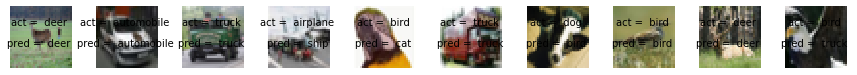

In [32]:
CLASSES = np.array ( [ ' airplane ' , ' automobile ' , ' bird ' , ' cat ' , ' deer ' , ' dog ' , ' frog ' , ' horse ' , ' ship ' , ' truck ' ] ) 

preds = model.predict ( x_test ) 
preds_single = CLASSES [ np . argmax ( preds , axis = 1 )] 
actual_single = CLASSES [ np . argmax ( y_test , axis = 1 )] 

import matplotlib.pyplot as plt 
n_to_show = 10 
indices = np.random.choice( range ( len ( x_test )), n_to_show )
fig = plt.figure(figsize = ( 15 , 3 ))
fig.subplots_adjust ( hspace = 0.4 , wspace = 0.4 ) 
for i , idx in enumerate ( indices ): 
  img = x_test [ idx ] 
  ax = fig.add_subplot ( 1 , n_to_show , i + 1 ) 
  ax.axis ( 'off' ) 
  ax.text ( 0.5 , 0.35 , 'pred = ' + str ( preds_single [ idx ]), fontsize = 10 , ha = 'center' , transform = ax . transAxes ) 
  ax.text ( 0.5 , 0.7 , 'act = ' + str ( actual_single [ idx ]), fontsize = 10 , ha = 'center' , transform = ax . transAxes ) 
  ax.imshow ( img ) 
